# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
np.random.seed(1)

# CSV Importing

In [3]:
data = pd.read_csv("Influenza_Report_CSV.csv")
#Displaying first few rows of the dataset
print(data)


    WHO region                ITZ COUNTRY/AREA/TERRITORY COUNTRY_CODE  \
0          AFR    Northern Africa                Algeria          DZA   
1          AFR    Northern Africa                Algeria          DZA   
2          AFR    Northern Africa                Algeria          DZA   
3          AFR    Northern Africa                Algeria          DZA   
4          AFR    Northern Africa                Algeria          DZA   
..         ...                ...                    ...          ...   
551        EUR  South West Europe                Albania          ALB   
552        EUR  South West Europe                Albania          ALB   
553        EUR  South West Europe                Albania          ALB   
554        EUR  South West Europe                Albania          ALB   
555        EUR  South West Europe                Albania          ALB   

    ORIGIN_SOURCE  ISO_YEAR  ISO_WEEK        DATE  SPEC_RECEIVED_NB  \
0      NOTDEFINED      2022        17  2022-04-24   

# STEP 2: Exploratory Data Analysis (EDA)
1. Perform exploratory data analysis to understand the structure, distributions, and relationships within the dataset.
2. Produce insightful summary statistics and visualizations to draw relevant insights and identify potential patterns or anomalies

## 2.1 Re importing data to only include required fields

In [4]:
# Keeping only required columns.
df = pd.read_csv('Influenza_Report_CSV.csv', usecols=[
    'COUNTRY/AREA/TERRITORY', 'ISO_YEAR', 'ISO_WEEK', 'DATE',
    'SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'AH1', 'AH1N12009', 'AH3', 
    'AH5', 'ANOTSUBTYPED', 'INF_A', 'BVIC', 'BYAM', 'BNOTDETERMINED', 
    'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ILI_ACTIVITY'])

#Converting to date time
df['DATE'] = pd.to_datetime(df['DATE'])
# Sorting the dataframe by country and date.
df.sort_values(['COUNTRY/AREA/TERRITORY', 'DATE'], ascending=True, inplace=True)
df.head()


,COUNTRY/AREA/TERRITORY,ISO_YEAR,ISO_WEEK,DATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BVIC,BYAM,BNOTDETERMINED,INF_B,INF_ALL,INF_NEGATIVE,ILI_ACTIVITY
190,Afghanistan,2022,17,2022-04-24,0.0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1
295,Afghanistan,2022,17,2022-04-24,33.0,33,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,33.0,1
191,Afghanistan,2022,18,2022-05-01,0.0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1
296,Afghanistan,2022,18,2022-05-01,10.0,10,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,10.0,1
192,Afghanistan,2022,19,2022-05-08,0.0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1


2.1 Summary

In [5]:
# Summary statistics for numerical features
print(df.describe(include='all'))

       COUNTRY/AREA/TERRITORY     ISO_YEAR    ISO_WEEK  \
count                     556   556.000000  556.000000   
unique                      5          NaN         NaN   
top               Afghanistan          NaN         NaN   
freq                      210          NaN         NaN   
mean                      NaN  2022.803957   26.561151   
min                       NaN  2022.000000    1.000000   
25%                       NaN  2022.000000   14.000000   
50%                       NaN  2023.000000   26.000000   
75%                       NaN  2023.000000   40.000000   
max                       NaN  2024.000000   52.000000   
std                       NaN     0.643234   15.109863   

                                 DATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
count                             556        327.000000         556.000000   
unique                            NaN               NaN                NaN   
top                               NaN               NaN              

## 2.2 Plots

Histogram plots for Influenza Reports

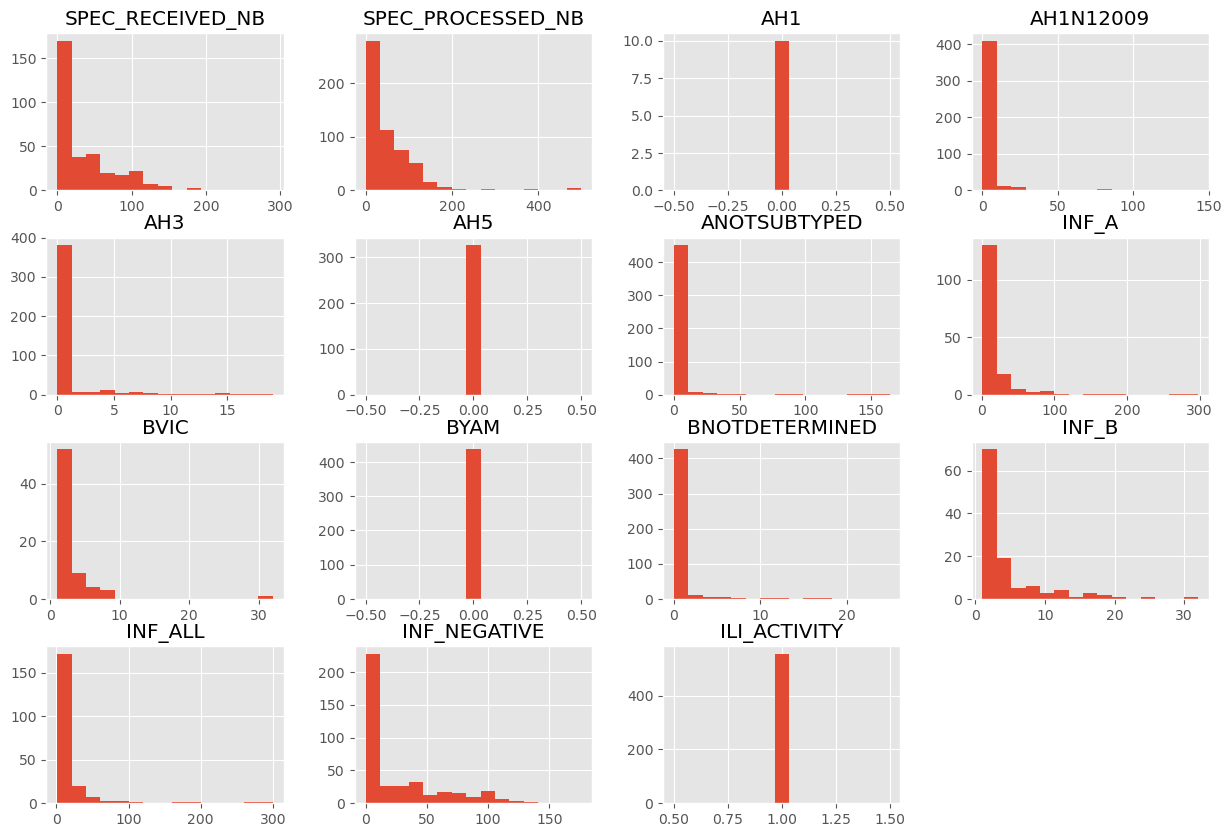

In [6]:
numerical_cols = ['SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'AH1', 'AH1N12009', 
                  'AH3', 'AH5', 'ANOTSUBTYPED', 'INF_A', 'BVIC', 'BYAM', 
                  'BNOTDETERMINED', 'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ILI_ACTIVITY']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.show()

Time series plot

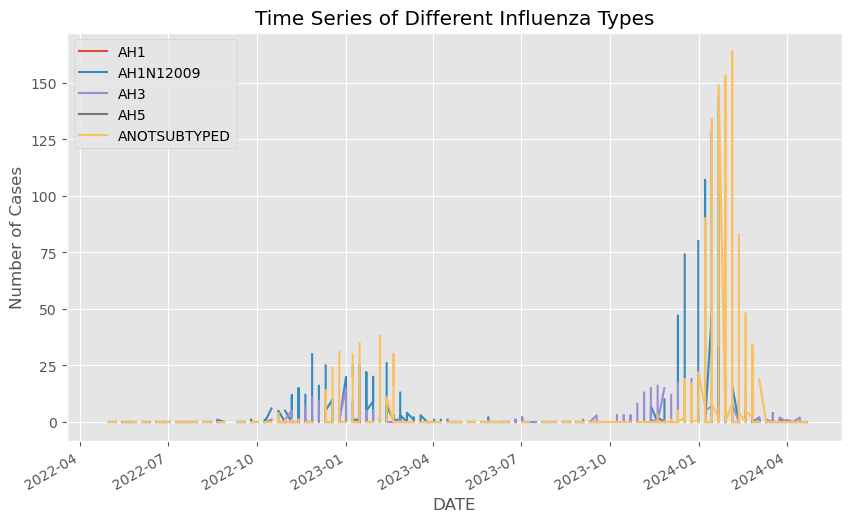

In [7]:
influenza_types = ['AH1', 'AH1N12009', 'AH3', 'AH5', 'ANOTSUBTYPED']
df.set_index('DATE')[influenza_types].plot(figsize=(10, 6))
plt.title('Time Series of Different Influenza Types')
plt.ylabel('Number of Cases')
plt.show()

Box Plot for anomalies

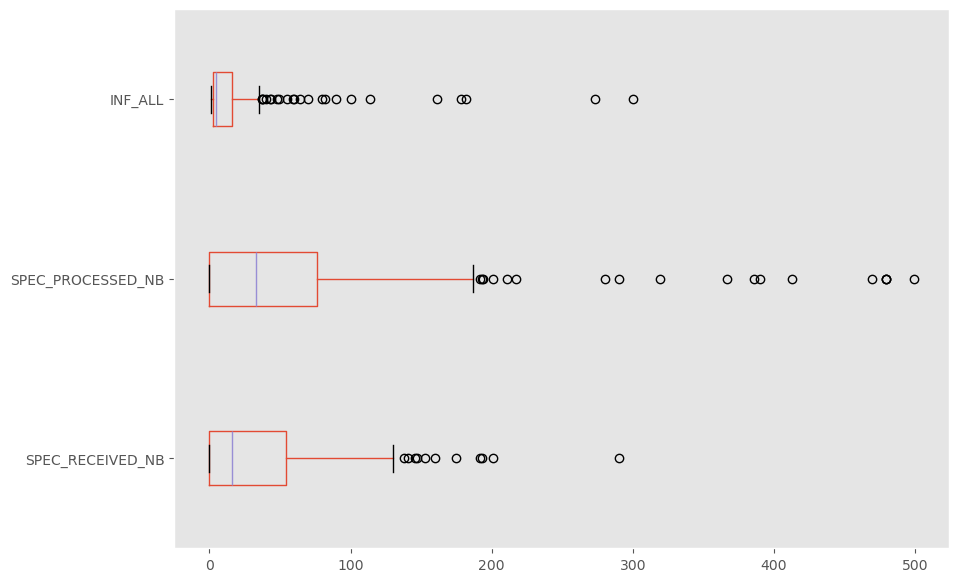

In [8]:
df.boxplot(column=['SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'INF_ALL'], grid=False, vert=False, figsize=(10, 7))
plt.show()

Frequency of cases in each country

In [9]:
print(df['COUNTRY/AREA/TERRITORY'].value_counts())

COUNTRY/AREA/TERRITORY
Afghanistan    210
Albania        156
Algeria        105
Anguilla        73
Angola          12
Name: count, dtype: int64


Influenza Activity Over Time by Country

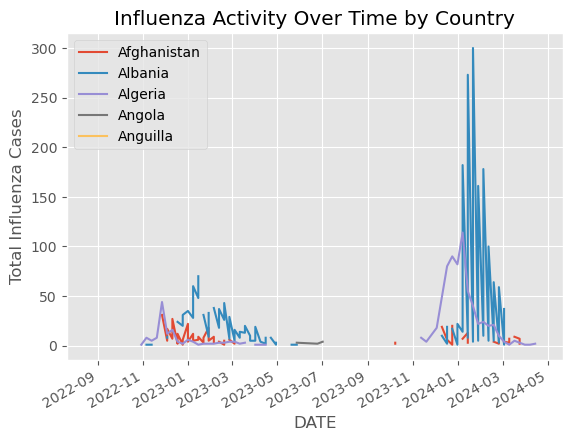

In [10]:
for country in df['COUNTRY/AREA/TERRITORY'].unique():
    country_data = df[df['COUNTRY/AREA/TERRITORY'] == country]
    country_data.set_index('DATE')['INF_ALL'].plot(label=country)
plt.legend()
plt.title('Influenza Activity Over Time by Country')
plt.ylabel('Total Influenza Cases')
plt.show()

# STEP 3: Data Cleaning and Preprocessing

1. Address missing values, outliers, and duplicates in the dataset through appropriate techniques such as imputation, trimming, or removal.
2. Investigate relationships and correlations between attributes to inform feature engineering decisions.
3. Split the dataset into training, and testing sets to ensure robust evaluation of model performance.
4. Use techniques such as stratified sampling to maintain class balance in classification tasks.

## 3.1 Address missing values, outliers, and duplicates in the dataset through appropriate techniques such as imputation, trimming, or removal.

3.1 Missin values handling

In [11]:
# bfore Cleaning
df.isnull().sum()

COUNTRY/AREA/TERRITORY      0
ISO_YEAR                    0
ISO_WEEK                    0
DATE                        0
SPEC_RECEIVED_NB          229
SPEC_PROCESSED_NB           0
AH1                       546
AH1N12009                 113
AH3                       117
AH5                       229
ANOTSUBTYPED               82
INF_A                     392
BVIC                      487
BYAM                      119
BNOTDETERMINED             91
INF_B                     440
INF_ALL                   345
INF_NEGATIVE              156
ILI_ACTIVITY                0
dtype: int64

In [12]:

for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
print(df.isnull().sum())


COUNTRY/AREA/TERRITORY    0
ISO_YEAR                  0
ISO_WEEK                  0
DATE                      0
SPEC_RECEIVED_NB          0
SPEC_PROCESSED_NB         0
AH1                       0
AH1N12009                 0
AH3                       0
AH5                       0
ANOTSUBTYPED              0
INF_A                     0
BVIC                      0
BYAM                      0
BNOTDETERMINED            0
INF_B                     0
INF_ALL                   0
INF_NEGATIVE              0
ILI_ACTIVITY              0
dtype: int64


3.1 Outliers

In [13]:
#Trimming/Removal: Identify outliers using methods like IQR (Interquartile Range) and remove them to avoid skewed data.
# Convert columns to numeric, if not already.
numeric_cols = ['SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'AH1', 'AH1N12009', 'AH3', 'AH5', 'ANOTSUBTYPED', 'INF_A', 'BVIC', 'BYAM', 'BNOTDETERMINED', 'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ILI_ACTIVITY']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate Q1, Q3 and IQR only for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers in the dataframe
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df.describe(include='all'))

       COUNTRY/AREA/TERRITORY     ISO_YEAR    ISO_WEEK  \
count                     338   338.000000  338.000000   
unique                      5          NaN         NaN   
top               Afghanistan          NaN         NaN   
freq                      127          NaN         NaN   
mean                      NaN  2022.644970   29.434911   
min                       NaN  2022.000000    1.000000   
25%                       NaN  2022.000000   21.000000   
50%                       NaN  2023.000000   30.000000   
75%                       NaN  2023.000000   39.000000   
max                       NaN  2024.000000   52.000000   
std                       NaN     0.564521   11.704962   

                                 DATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
count                             338        338.000000         338.000000   
unique                            NaN               NaN                NaN   
top                               NaN               NaN              

3.1 Handling Duplicates

In [14]:
df.drop_duplicates(inplace=True)

## 3.2 Investigate relationships and correlations between attributes to inform feature engineering decisions

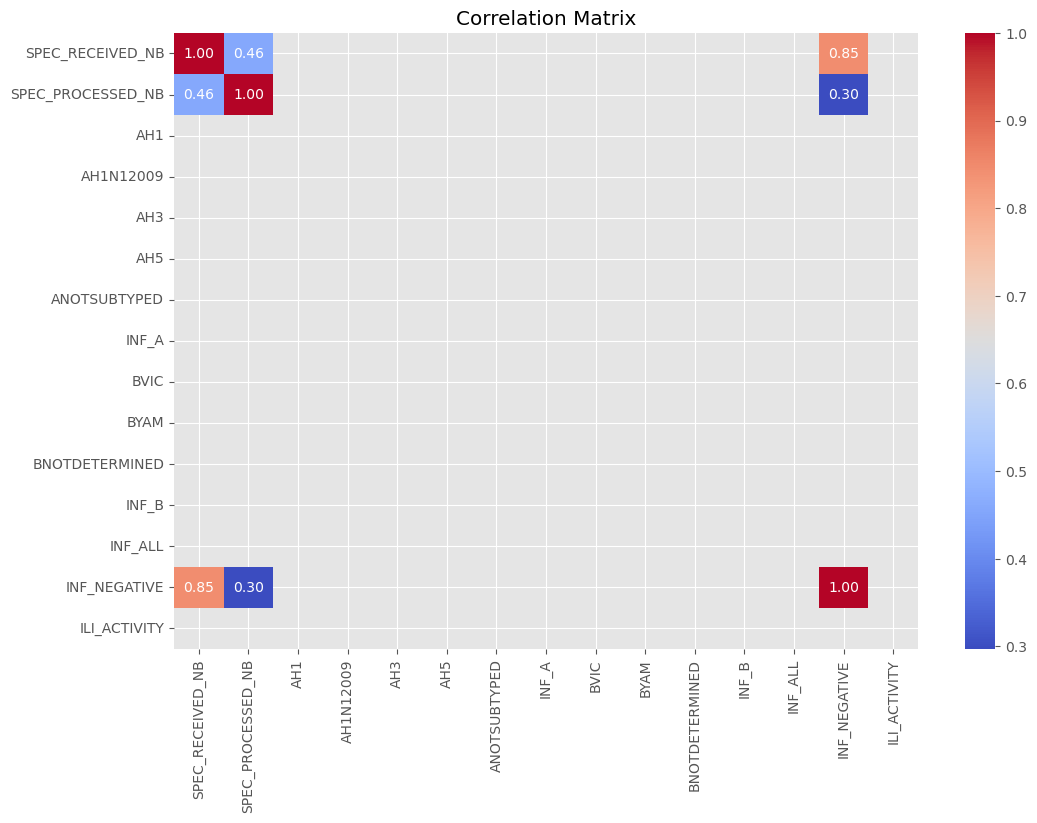

In [15]:
### Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3.2 scatter plot

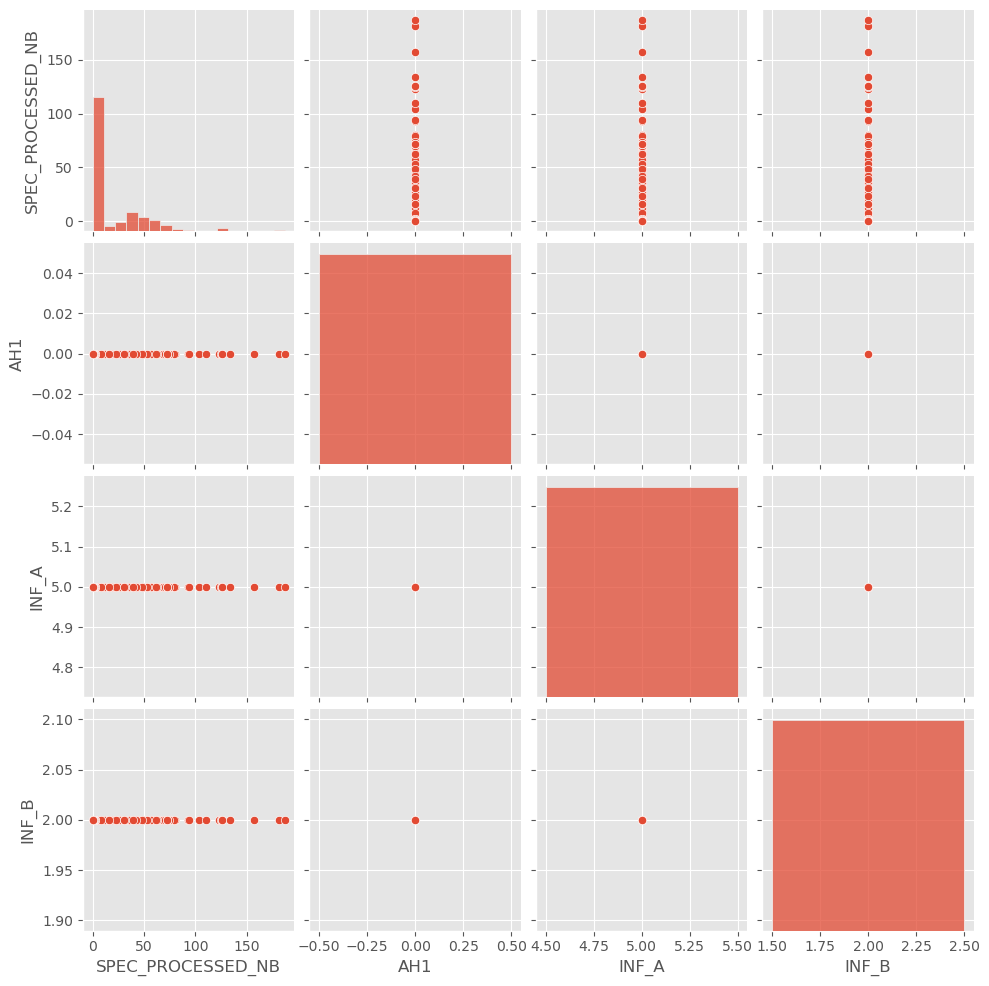

In [16]:
sns.pairplot(df, vars=['SPEC_PROCESSED_NB', 'AH1', 'INF_A', 'INF_B'])
plt.show()

## 3.3 Split the dataset into training, and testing sets to ensure robust evaluation of model performance.

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('COUNTRY/AREA/TERRITORY', axis=1)
y = df['COUNTRY/AREA/TERRITORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3.4 Use techniques such as stratified sampling to maintain class balance in classification tasks.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Model Selection and Training

## 4.1: Design and train at least three types of ML models: 
1. traditional ML model: Decision trees 

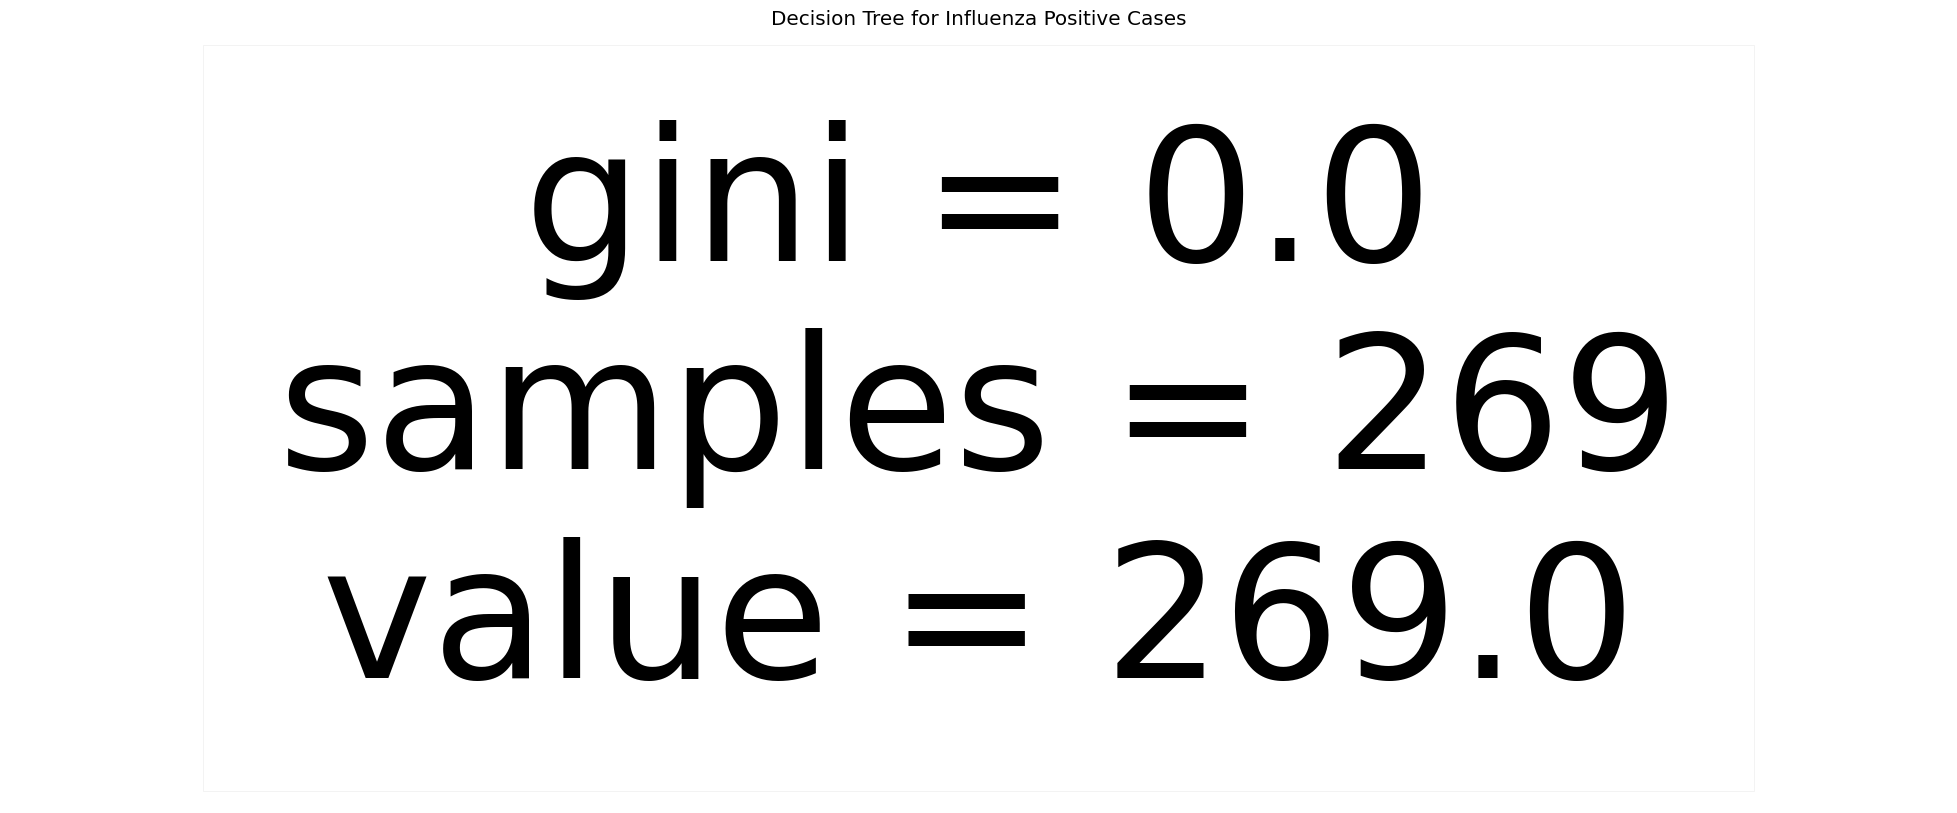

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Preparing the data
X = df.drop(columns=['INF_ALL', 'COUNTRY/AREA/TERRITORY', 'ISO_YEAR', 'ISO_WEEK', 'DATE', 'ILI_ACTIVITY'])
y = df['INF_ALL'].fillna(0)  # Fill NaN values as required

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the decision tree
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(25, 10))  # Adjust size to make sure the tree is not squeezed
tree.plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=True)
plt.title('Decision Tree for Influenza Positive Cases')
plt.show()

2. one ensemble model: Random Forest 

3. one deep learning model: neural networks